In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
data = pd.read_csv('data/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Cleaning

In [4]:

# Check for missing values
print('Missing Values:\n', data.isnull().sum())

# Check for duplicates
print('\nDuplicates:', data.duplicated().sum())


Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Duplicates: 0


# Exploratory Data Analysis (EDA)

C:\Users\ASIM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASIM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASIM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASIM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

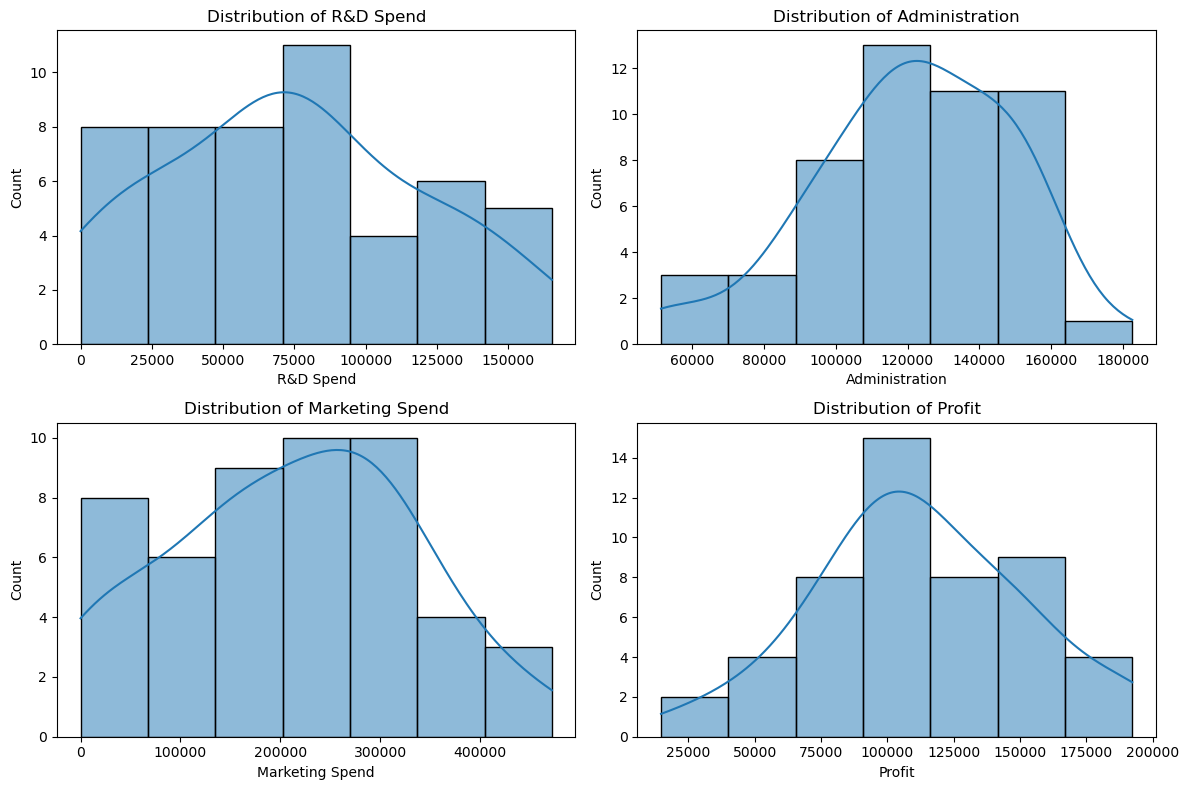

In [5]:
# Distribution of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'],1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

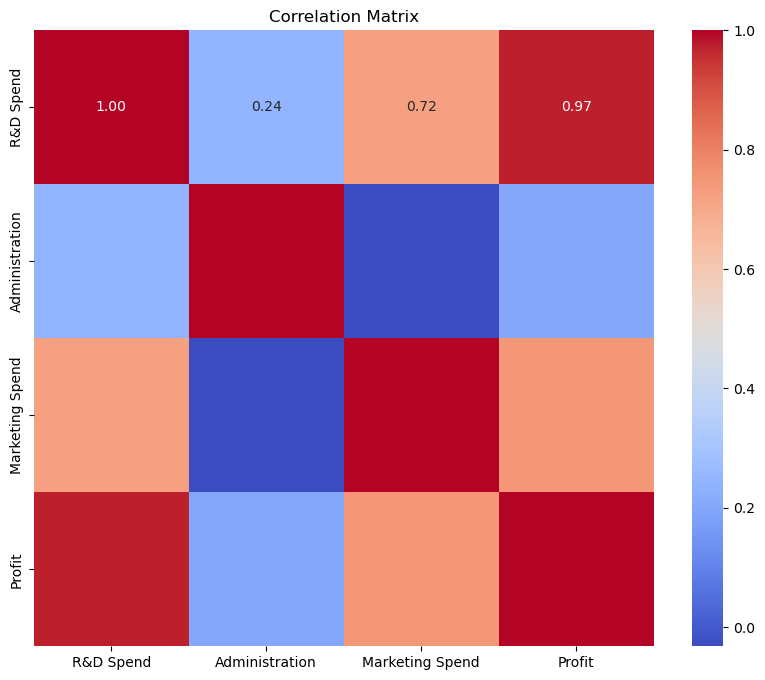

In [6]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

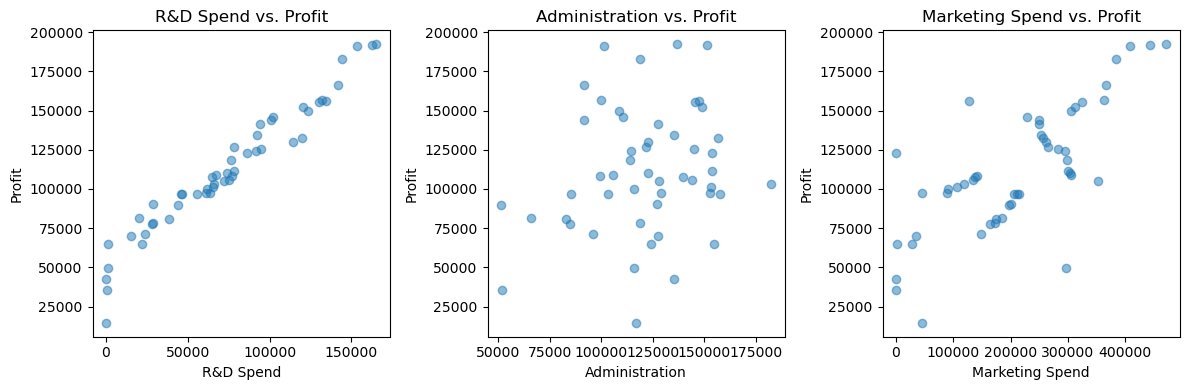

In [7]:
# Scatter plots of features vs. Profit
plt.figure(figsize=(12, 4))
for i, col in enumerate(['R&D Spend', 'Administration', 'Marketing Spend'], 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[col], data['Profit'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Profit')
    plt.title(f'{col} vs. Profit')
plt.tight_layout()
plt.show()


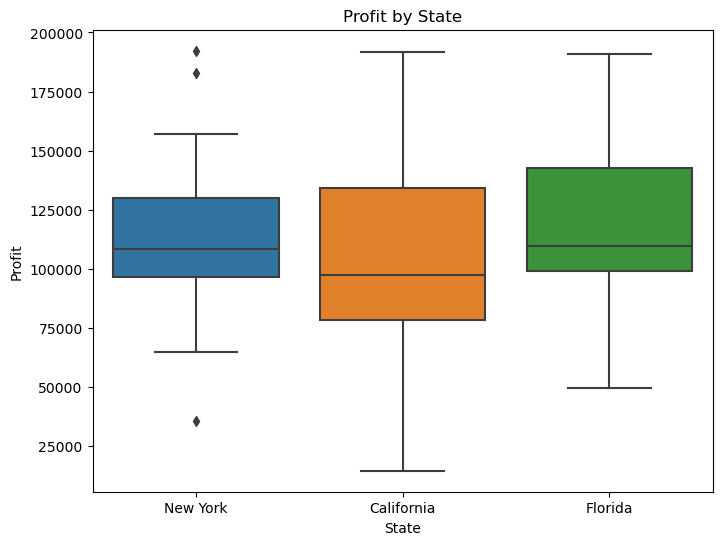

In [8]:
# Box plot of Profit by State
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=data)
plt.title('Profit by State')
plt.show()


# Preprocessing

In [9]:

# Define features and target
X = data.drop('Profit', axis=1)
y = data['Profit']

In [10]:
X.head(10)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [11]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [12]:
# Define numerical and categorical columns
num_cols = ['R&D Spend', 'Administration', 'Marketing Spend']
cat_cols = ['State']
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [13]:
num_cols

['R&D Spend', 'Administration', 'Marketing Spend']

In [14]:
cat_cols

['State']

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [17]:
X_train_processed.shape

(40, 6)

In [18]:
X_train_processed

array([[ 0.34202149,  0.22787678,  0.12425038,  0.        ,  1.        ,
         0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  0.        ,  1.        ,
         0.        ],
       [-0.71081297, -2.5770186 , -0.34136825,  1.        ,  0.        ,
         0.        ],
       [ 0.90611438,  1.0172367 ,  0.66890185,  0.        ,  0.        ,
         1.        ],
       [ 1.40997088, -0.09115403,  1.30006861,  0.        ,  0.        ,
         1.        ],
       [ 1.20367103,  0.96116332, -0.95248784,  1.        ,  0.        ,
         0.        ],
       [-1.05285826, -1.34392538, -0.62843389,  0.        ,  1.        ,
         0.        ],
       [-1.61480906, -0.19649414,  0.54106768,  0.        ,  1.        ,
         0.        ],
       [-1.642623  ,  0.52691442, -2.07854935,  1.        ,  0.        ,
         0.        ],
       [ 0.77885123,  0.05437051,  0.2294954 ,  0.        ,  0.        ,
         1.        ],
       [ 0.96515572, -0.45976843,  0.61043134,  1.

In [19]:
#Get feature names after one-hot encoding
feature_names = num_cols + [f"State_{state}" for state in preprocessor.named_transformers_['cat'].categories_[0][:]]


In [20]:
feature_names

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_California',
 'State_Florida',
 'State_New York']

# Linear Regression (Using R&D Spend)

In [21]:
X_train_rd = X_train[['R&D Spend']]
X_test_rd = X_test[['R&D Spend']]

In [22]:
X_train_rd

,R&D Spend
12,93863.75
4,142107.34
37,44069.95
8,120542.52
3,144372.41
6,134615.46
41,27892.92
46,1315.46
47,0.00
15,114523.61


In [23]:
# Standardize R&D Spend
scaler_rd = StandardScaler()
X_train_rd_scaled = scaler_rd.fit_transform(X_train_rd)
X_test_rd_scaled = scaler_rd.transform(X_test_rd)

In [24]:
X_train_rd_scaled

array([[ 0.34202149],
       [ 1.36207849],
       [-0.71081297],
       [ 0.90611438],
       [ 1.40997088],
       [ 1.20367103],
       [-1.05285826],
       [-1.61480906],
       [-1.642623  ],
       [ 0.77885123],
       [ 0.96515572],
       [ 0.00687736],
       [-0.01361318],
       [-0.66099544],
       [-0.34996231],
       [ 1.85350175],
       [-1.17369938],
       [-0.11798808],
       [-0.46926521],
       [ 1.14576723],
       [-0.25546817],
       [ 0.48597351],
       [-1.03655971],
       [ 1.79532434],
       [ 0.01483507],
       [ 1.6017269 ],
       [-1.3147716 ],
       [-0.66970778],
       [-0.21472284],
       [-1.03464471],
       [ 0.51221561],
       [-0.07809041],
       [ 0.29731084],
       [-1.642623  ],
       [-0.03032003],
       [ 1.11238589],
       [-1.14276186],
       [ 0.89344327],
       [-0.24603715],
       [-1.21489084]])

In [25]:
X_test_rd_scaled 

array([[ 0.30245367],
       [-0.82734624],
       [-0.33181874],
       [-1.62147425],
       [ 0.35879726],
       [-1.63116196],
       [-0.04987791],
       [-0.2753597 ],
       [-0.30191325],
       [ 0.18462534]])

**Train without normalizing**

In [26]:
X_train_rd.head()

,R&D Spend
12,93863.75
4,142107.34
37,44069.95
8,120542.52
3,144372.41


In [27]:
# Train model
lr1 = LinearRegression()
lr1.fit(X_train_rd, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Predict
y_pred_lr1 = lr1.predict(X_test_rd)
y_pred_lr1

array([127862.20996405,  82250.56334619, 102255.72078164,  50190.4734756 ,
       130136.88190548,  49799.36685472, 113638.0775288 , 104535.0534288 ,
       103463.04843113, 123105.31102669])

In [29]:
# Evaluate
lr_metrics1 = {
    'MSE': mean_squared_error(y_test, y_pred_lr1),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr1)),
    'MAE': mean_absolute_error(y_test, y_pred_lr1)
}
print('Linear Regression Metrics:', lr_metrics1)

Linear Regression Metrics: {'MSE': 59510962.80787996, 'RMSE': 7714.334890830185, 'MAE': 6077.363300620399}


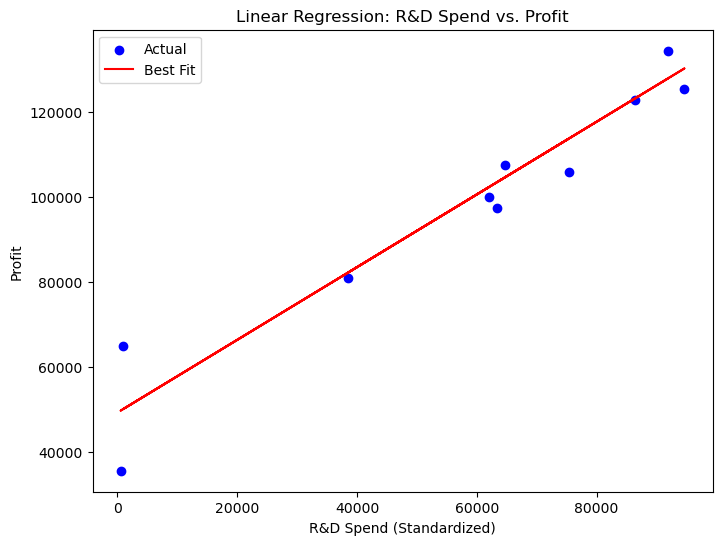

In [30]:
# Visualize best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_rd, y_test, color='blue', label='Actual')
plt.plot(X_test_rd, y_pred_lr1, color='red', label='Best Fit')
plt.xlabel('R&D Spend (Standardized)')
plt.ylabel('Profit')
plt.title('Linear Regression: R&D Spend vs. Profit')
plt.legend()
plt.show()

**With normaliztion**

In [31]:
# Train model
lr = LinearRegression()
lr.fit(X_train_rd_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# Predict
y_pred_lr = lr.predict(X_test_rd_scaled)
y_pred_lr

array([127862.20996405,  82250.56334619, 102255.72078164,  50190.4734756 ,
       130136.88190548,  49799.36685472, 113638.0775288 , 104535.0534288 ,
       103463.04843113, 123105.31102669])

In [33]:
# Evaluate
lr_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr)
}
print('Linear Regression Metrics:', lr_metrics)

Linear Regression Metrics: {'MSE': 59510962.80787997, 'RMSE': 7714.334890830185, 'MAE': 6077.363300620399}


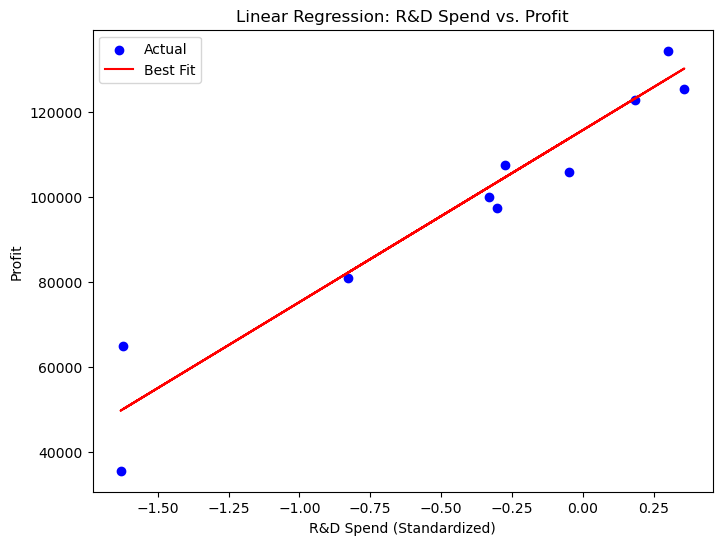

In [34]:
# Visualize best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_rd_scaled, y_test, color='blue', label='Actual')
plt.plot(X_test_rd_scaled, y_pred_lr, color='red', label='Best Fit')
plt.xlabel('R&D Spend (Standardized)')
plt.ylabel('Profit')
plt.title('Linear Regression: R&D Spend vs. Profit')
plt.legend()
plt.show()

# Multiple Linear Regression

In [35]:
# Train model
mlr = LinearRegression()
mlr.fit(X_train_processed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
X_train_processed

array([[ 0.34202149,  0.22787678,  0.12425038,  0.        ,  1.        ,
         0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  0.        ,  1.        ,
         0.        ],
       [-0.71081297, -2.5770186 , -0.34136825,  1.        ,  0.        ,
         0.        ],
       [ 0.90611438,  1.0172367 ,  0.66890185,  0.        ,  0.        ,
         1.        ],
       [ 1.40997088, -0.09115403,  1.30006861,  0.        ,  0.        ,
         1.        ],
       [ 1.20367103,  0.96116332, -0.95248784,  1.        ,  0.        ,
         0.        ],
       [-1.05285826, -1.34392538, -0.62843389,  0.        ,  1.        ,
         0.        ],
       [-1.61480906, -0.19649414,  0.54106768,  0.        ,  1.        ,
         0.        ],
       [-1.642623  ,  0.52691442, -2.07854935,  1.        ,  0.        ,
         0.        ],
       [ 0.77885123,  0.05437051,  0.2294954 ,  0.        ,  0.        ,
         1.        ],
       [ 0.96515572, -0.45976843,  0.61043134,  1.

In [37]:
# Predict
y_pred_mlr = mlr.predict(X_test_processed)

# Evaluate
mlr_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_mlr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_mlr)),
    'MAE': mean_absolute_error(y_test, y_pred_mlr)
}
print('Multiple Linear Regression Metrics:', mlr_metrics)


Multiple Linear Regression Metrics: {'MSE': 82010363.04501358, 'RMSE': 9055.957323497807, 'MAE': 6961.47781327556}


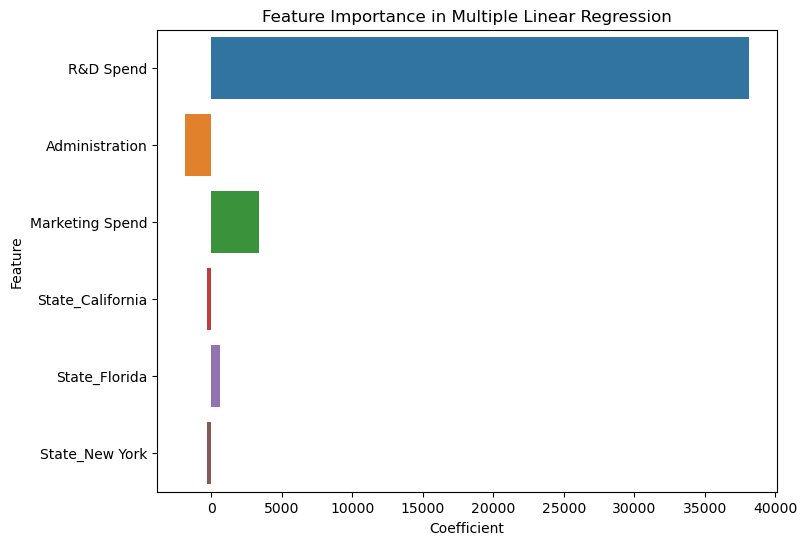

In [38]:
# Feature importance
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': mlr.coef_})
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance in Multiple Linear Regression')
plt.show()


# Model Comparison

In [39]:
# Compare metrics
metrics_df = pd.DataFrame({'Linear Regression': lr_metrics, 'Multiple Linear Regression': mlr_metrics})
print('Model Comparison:\n', metrics_df)

Model Comparison:
       Linear Regression  Multiple Linear Regression
MSE        5.951096e+07                8.201036e+07
RMSE       7.714335e+03                9.055957e+03
MAE        6.077363e+03                6.961478e+03


# Prediction Pipeline

In [40]:
# Create full pipeline
mlr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit pipeline
mlr_pipeline.fit(X_train, y_train)

# Function to predict profit
def predict_profit(rd_spend, administration, marketing_spend, state):
    input_data = pd.DataFrame({
        'R&D Spend': [rd_spend],
        'Administration': [administration],
        'Marketing Spend': [marketing_spend],
        'State': [state]
    })
    prediction = mlr_pipeline.predict(input_data)[0]
    return prediction

# Example prediction
example = predict_profit(100000, 120000, 300000, 'New York')
print(f'Predicted Profit for R&D Spend=100000, Administration=120000, Marketing Spend=300000, State=New York: ${example:.2f}')

Predicted Profit for R&D Spend=100000, Administration=120000, Marketing Spend=300000, State=New York: $135300.12
